## Auto Encoders

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [6]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [7]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

In [8]:



# Build the autoencoder model
input_dim = X_scaled.shape[1]
encoding_dim = 2  # We will reduce to 2 dimensions for visualization

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder
autoencoder = Model(input_layer, decoded)

# Encoder model to extract the encoded representation
encoder = Model(input_layer, encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=256, validation_split=0.2)



# Use the encoded layer to encode the training input


Epoch 1/100
1/1 [==============================] - 0s 247ms/step - loss: 0.0885 - val_loss: 0.0544
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0883 - val_loss: 0.0543
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0880 - val_loss: 0.0541
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0877 - val_loss: 0.0540
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0874 - val_loss: 0.0539
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0871 - val_loss: 0.0539
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0869 - val_loss: 0.0538
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0866 - val_loss: 0.0537
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0863 - val_loss: 0.0536
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0861 - val_loss: 0.0535
Epoch 11/100
1/1 [

Epoch 84/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0724 - val_loss: 0.0484
Epoch 85/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0723 - val_loss: 0.0483
Epoch 86/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0722 - val_loss: 0.0482
Epoch 87/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0721 - val_loss: 0.0481
Epoch 88/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0719 - val_loss: 0.0480
Epoch 89/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0718 - val_loss: 0.0479
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0717 - val_loss: 0.0479
Epoch 91/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0716 - val_loss: 0.0478
Epoch 92/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0714 - val_loss: 0.0477
Epoch 93/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0713 - val_loss: 0.0476
Epoch 94/1

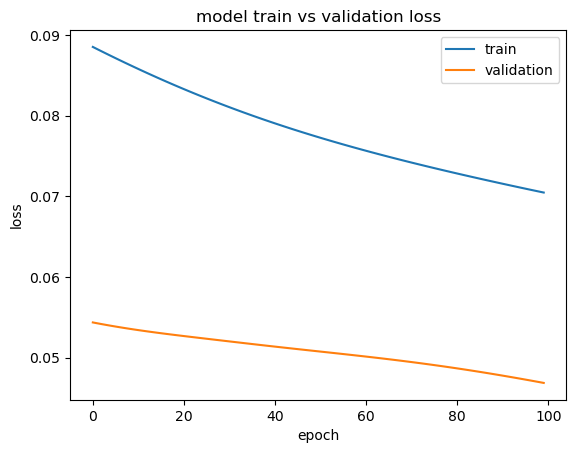

In [9]:

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


In [10]:
encoded_X = encoder.predict(X_scaled)

5/5 [==============================] - 0s 704us/step


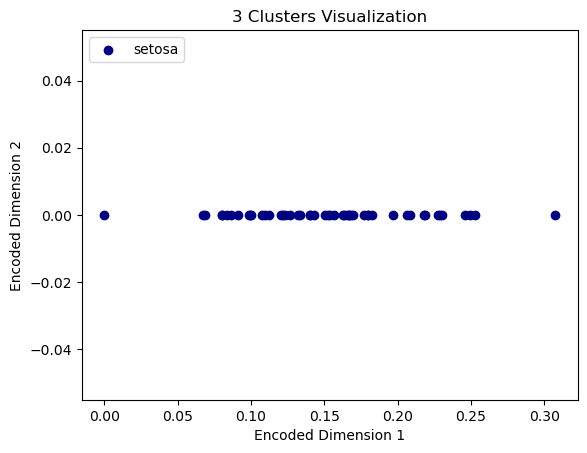

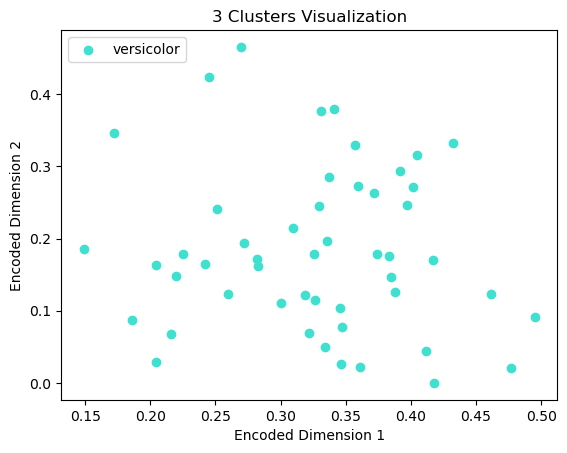

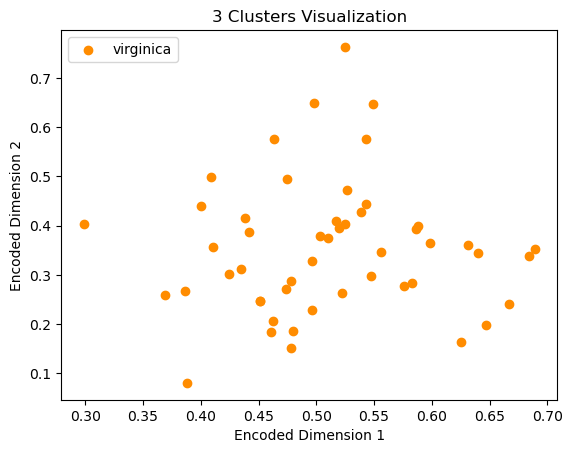

In [12]:
plot3clusters(encoded_X, '3 Clusters Visualization', 'Encoded Dimension ')